In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# from pandas_profiling import ProfileReport


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/population2020/population2020.csv
/kaggle/input/covid19-global-forecasting-week-1/train.csv
/kaggle/input/covid19-global-forecasting-week-1/submission.csv
/kaggle/input/covid19-global-forecasting-week-1/test.csv
/kaggle/input/gdp2020/GDP2020.csv


In [2]:
train = pd.read_csv('/kaggle/input/covid19-global-forecasting-week-1/train.csv')
test = pd.read_csv('/kaggle/input/covid19-global-forecasting-week-1/test.csv')
submission = pd.read_csv('/kaggle/input/covid19-global-forecasting-week-1/submission.csv')

In [3]:
train.head()

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,33.0,65.0,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,33.0,65.0,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,33.0,65.0,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,33.0,65.0,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,33.0,65.0,2020-01-26,0.0,0.0


In [4]:
test.head()

,ForecastId,Province/State,Country/Region,Lat,Long,Date
0,1,NaN,Afghanistan,33.0,65.0,2020-03-12
1,2,NaN,Afghanistan,33.0,65.0,2020-03-13
2,3,NaN,Afghanistan,33.0,65.0,2020-03-14
3,4,NaN,Afghanistan,33.0,65.0,2020-03-15
4,5,NaN,Afghanistan,33.0,65.0,2020-03-16


In [5]:
test.count()

ForecastId        12212
Province/State     5590
Country/Region    12212
Lat               12212
Long              12212
Date              12212
dtype: int64

In [6]:
submission.count()

ForecastId        12212
ConfirmedCases    12212
Fatalities        12212
dtype: int64

In [7]:
# train_profile = ProfileReport(train, title='Pandas Profiling Report', html={'style':{'full_width':True}})
# train_profile

In [8]:
# test_profile = ProfileReport(test, title='Pandas Profiling Report', html={'style':{'full_width':True}})
# test_profile

In [9]:
train['Country/Region'].nunique(), test['Country/Region'].nunique()

(163, 163)

In [10]:
set(train['Country/Region']) - set(test['Country/Region'])

set()

In [11]:
 test['Date'].unique(),  test['Date'].nunique()

(array(['2020-03-12', '2020-03-13', '2020-03-14', '2020-03-15',
        '2020-03-16', '2020-03-17', '2020-03-18', '2020-03-19',
        '2020-03-20', '2020-03-21', '2020-03-22', '2020-03-23',
        '2020-03-24', '2020-03-25', '2020-03-26', '2020-03-27',
        '2020-03-28', '2020-03-29', '2020-03-30', '2020-03-31',
        '2020-04-01', '2020-04-02', '2020-04-03', '2020-04-04',
        '2020-04-05', '2020-04-06', '2020-04-07', '2020-04-08',
        '2020-04-09', '2020-04-10', '2020-04-11', '2020-04-12',
        '2020-04-13', '2020-04-14', '2020-04-15', '2020-04-16',
        '2020-04-17', '2020-04-18', '2020-04-19', '2020-04-20',
        '2020-04-21', '2020-04-22', '2020-04-23'], dtype=object),
 43)

## Just take a look in China familiar with the trend of Data 

In [12]:
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
train[train['Country/Region']=='China'].head()

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities
2867,4372,Anhui,China,31.8257,117.2264,2020-01-22,1.0,0.0
2868,4373,Anhui,China,31.8257,117.2264,2020-01-23,9.0,0.0
2869,4374,Anhui,China,31.8257,117.2264,2020-01-24,15.0,0.0
2870,4375,Anhui,China,31.8257,117.2264,2020-01-25,39.0,0.0
2871,4376,Anhui,China,31.8257,117.2264,2020-01-26,60.0,0.0


In [14]:
train_timeseries_Confirmed = train[train['Country/Region']=='China'].groupby('Date')['ConfirmedCases'].sum()
train_timeseries_Fatalities = train[train['Country/Region']=='China'].groupby('Date')['Fatalities'].sum()

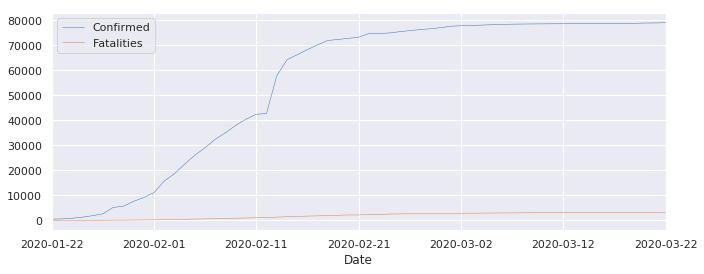

In [15]:
sns.set(rc={'figure.figsize':(11, 4)})
train_timeseries_Confirmed.plot(linewidth=0.5,label='Confirmed')
train_timeseries_Fatalities.plot(linewidth=0.5,label='Fatalities')
plt.legend()

### Normalization

In [16]:
train_timeseries_Confirmed_norm = (train_timeseries_Confirmed-train_timeseries_Confirmed.mean())/train_timeseries_Confirmed.std()
train_timeseries_Fatalities_norm = (train_timeseries_Fatalities-train_timeseries_Fatalities.mean())/train_timeseries_Fatalities.std()

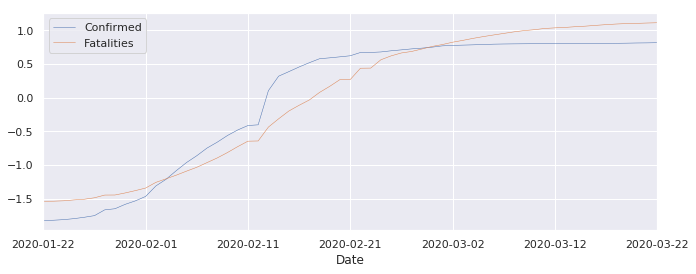

In [17]:
sns.set(rc={'figure.figsize':(11, 4)})
train_timeseries_Confirmed_norm.plot(linewidth=0.5,label='Confirmed')
train_timeseries_Fatalities_norm.plot(linewidth=0.5,label='Fatalities')
plt.legend()

## Training Directly from original data using sklearn

1. Linear Regression
2. SVM classification
3. SVM Regression
4. Random forest

In [18]:
train.head()

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,33.0,65.0,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,33.0,65.0,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,33.0,65.0,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,33.0,65.0,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,33.0,65.0,2020-01-26,0.0,0.0


### Province encoding

Set `nan` as index 0

In [19]:
province_encoded = dict(enumerate(train['Province/State'].unique()))
province_encoded = dict(map(reversed, province_encoded.items()))

In [20]:
train['province_encoded'] = train['Province/State'].apply(lambda x: province_encoded[x])
train.head()

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities,province_encoded
0,1,NaN,Afghanistan,33.0,65.0,2020-01-22,0.0,0.0,0
1,2,NaN,Afghanistan,33.0,65.0,2020-01-23,0.0,0.0,0
2,3,NaN,Afghanistan,33.0,65.0,2020-01-24,0.0,0.0,0
3,4,NaN,Afghanistan,33.0,65.0,2020-01-25,0.0,0.0,0
4,5,NaN,Afghanistan,33.0,65.0,2020-01-26,0.0,0.0,0


### Country Encoding

In [21]:
country_encoded = dict(enumerate(train['Country/Region'].unique()))
country_encoded = dict(map(reversed, country_encoded.items()))

In [22]:
train['country_encoded'] = train['Country/Region'].apply(lambda x: country_encoded[x])
train.head()

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities,province_encoded,country_encoded
0,1,NaN,Afghanistan,33.0,65.0,2020-01-22,0.0,0.0,0,0
1,2,NaN,Afghanistan,33.0,65.0,2020-01-23,0.0,0.0,0,0
2,3,NaN,Afghanistan,33.0,65.0,2020-01-24,0.0,0.0,0,0
3,4,NaN,Afghanistan,33.0,65.0,2020-01-25,0.0,0.0,0,0
4,5,NaN,Afghanistan,33.0,65.0,2020-01-26,0.0,0.0,0,0


### Date Encoding: sequential timestamp (poor design)

In [23]:
from datetime import datetime
import time

In [24]:
# date_encoded = {}
# for s in train['Date'].unique():
#     date_encoded[s] = time.mktime(datetime.strptime(s, "%Y-%m-%d").timetuple())

In [25]:
# train['date_encoded'] = train['Date'].apply(lambda x: date_encoded[x])
# train['date_encoded'] = (train['date_encoded'] - train['date_encoded'].mean()) / train['date_encoded'].std()
# train.head()

### Date encoding: convert `y-m-d`  to Month.and Day.

In [26]:
train['Mon'] = train['Date'].apply(lambda x: int(x.split('-')[1]))
train['Day'] = train['Date'].apply(lambda x: int(x.split('-')[2]))

### Date encoding: enhance by serial fetures (poor design)

In [27]:
train['serial'] = train['Mon'] * 30 + train['Day']
train.head()

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities,province_encoded,country_encoded,Mon,Day,serial
0,1,NaN,Afghanistan,33.0,65.0,2020-01-22,0.0,0.0,0,0,1,22,52
1,2,NaN,Afghanistan,33.0,65.0,2020-01-23,0.0,0.0,0,0,1,23,53
2,3,NaN,Afghanistan,33.0,65.0,2020-01-24,0.0,0.0,0,0,1,24,54
3,4,NaN,Afghanistan,33.0,65.0,2020-01-25,0.0,0.0,0,0,1,25,55
4,5,NaN,Afghanistan,33.0,65.0,2020-01-26,0.0,0.0,0,0,1,26,56


In [28]:
train['serial'] = train['serial'] - train['serial'].min()

In [29]:
train.describe()

,Id,Lat,Long,ConfirmedCases,Fatalities,province_encoded,country_encoded,Mon,Day,serial
count,17324.000000,17324.000000,17324.000000,17324.000000,17324.000000,17324.000000,17324.000000,17324.000000,17324.000000,17324.000000
mean,13190.500000,26.287693,4.766191,293.191180,10.421208,29.302817,86.144366,2.196721,15.622951,29.524590
std,7624.680783,22.935113,79.923334,3382.665468,155.612328,40.528762,54.689975,0.697079,8.652292,17.775617
min,1.000000,-41.454500,-157.498300,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,6595.750000,13.145425,-71.516375,0.000000,0.000000,0.000000,29.000000,2.000000,8.000000,14.000000
50%,13190.500000,32.985550,9.775000,0.000000,0.000000,0.000000,83.500000,2.000000,16.000000,29.000000
75%,19785.250000,42.501575,64.688975,8.000000,0.000000,57.250000,152.250000,3.000000,23.000000,45.000000
max,26380.000000,71.706900,174.886000,67800.000000,5476.000000,128.000000,162.000000,3.000000,31.000000,60.000000


### Extra Dataset

In [30]:
gdp2020 = pd.read_csv('/kaggle/input/gdp2020/GDP2020.csv')
population2020 = pd.read_csv('/kaggle/input/population2020/population2020.csv')

In [31]:
gdp2020 = gdp2020.rename(columns={"rank":"rank_gdp"})
gdp2020_numeric_list = [list(gdp2020)[0]] + list(gdp2020)[2:-1]
gdp2020.head()

,rank_gdp,country,imfGDP,unGDP,gdpPerCapita,pop
0,1,United States,2.219812e+13,18624475000000,67063.2695,331002.651
1,2,China,1.546810e+13,11218281029298,10746.7828,1439323.776
2,3,Japan,5.495420e+12,4936211827875,43450.1405,126476.461
3,4,Germany,4.157120e+12,3477796274497,49617.1450,83783.942
4,5,India,3.257720e+12,2259642382872,2360.6592,1380004.385


In [32]:
population2020 = population2020.rename(columns={"rank":"rank_pop"})
population2020_numeric_list = [list(population2020)[0]] + list(gdp2020)[2:]
population2020.head()

,rank_pop,name,density,densityMi,pop2020,area
0,1,Macau,21644.5000,56059.2550,649.335,30.00
1,2,Monaco,19426.7327,50315.2376,39.242,2.02
2,3,Singapore,8239.9183,21341.3884,5850.342,710.00
3,4,Hong Kong,6790.7437,17588.0261,7496.981,1104.00
4,5,Gibraltar,5615.1667,14543.2817,33.691,6.00


In [33]:
len(train)

17324

In [34]:
train = pd.merge(train, population2020, how='left', left_on = 'Country/Region', right_on = 'name')

In [35]:
len(train)

17324

In [36]:
train = pd.merge(train, gdp2020, how='left', left_on = 'Country/Region', right_on = 'country')

In [37]:
len(train)

17324

In [38]:
train.head()

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities,province_encoded,country_encoded,...,density,densityMi,pop2020,area,rank_gdp,country,imfGDP,unGDP,gdpPerCapita,pop
0,1,NaN,Afghanistan,33.0,65.0,2020-01-22,0.0,0.0,0,0,...,59.685,154.5841,38928.346,652230.0,116.0,Afghanistan,2.068200e+10,2.023506e+10,531.2838,38928.346
1,2,NaN,Afghanistan,33.0,65.0,2020-01-23,0.0,0.0,0,0,...,59.685,154.5841,38928.346,652230.0,116.0,Afghanistan,2.068200e+10,2.023506e+10,531.2838,38928.346
2,3,NaN,Afghanistan,33.0,65.0,2020-01-24,0.0,0.0,0,0,...,59.685,154.5841,38928.346,652230.0,116.0,Afghanistan,2.068200e+10,2.023506e+10,531.2838,38928.346
3,4,NaN,Afghanistan,33.0,65.0,2020-01-25,0.0,0.0,0,0,...,59.685,154.5841,38928.346,652230.0,116.0,Afghanistan,2.068200e+10,2.023506e+10,531.2838,38928.346
4,5,NaN,Afghanistan,33.0,65.0,2020-01-26,0.0,0.0,0,0,...,59.685,154.5841,38928.346,652230.0,116.0,Afghanistan,2.068200e+10,2.023506e+10,531.2838,38928.346


In [39]:
list(train)

['Id',
 'Province/State',
 'Country/Region',
 'Lat',
 'Long',
 'Date',
 'ConfirmedCases',
 'Fatalities',
 'province_encoded',
 'country_encoded',
 'Mon',
 'Day',
 'serial',
 'rank_pop',
 'name',
 'density',
 'densityMi',
 'pop2020',
 'area',
 'rank_gdp',
 'country',
 'imfGDP',
 'unGDP',
 'gdpPerCapita',
 'pop']

### Drop Nan cells or repalce them to more suitable values

In [40]:
train.isnull().sum()

Id                     0
Province/State      9394
Country/Region         0
Lat                    0
Long                   0
Date                   0
ConfirmedCases         0
Fatalities             0
province_encoded       0
country_encoded        0
Mon                    0
Day                    0
serial                 0
rank_pop            4514
name                4514
density             4514
densityMi           4514
pop2020             4514
area                4514
rank_gdp            4880
country             4880
imfGDP              4880
unGDP               4880
gdpPerCapita        4880
pop                 4880
dtype: int64

Set extra attributes to zero

In [41]:
train = train.fillna(0)

Which country has `nan` coordinate ?

In [42]:
train['Country/Region'][train.isnull()['Lat'] | train.isnull()['Long']].unique()

array([], dtype=object)

Find out coordinate in Aruba from extra information

In [43]:
# train.loc[:,'Lat'][train['Country/Region']=='Aruba'] = -69.9683
# train.loc[:,'Long'][train['Country/Region']=='Aruba'] = 12.5211

### Generate the numeric input for training

In [44]:
numeric_features_X = ['Lat','Long', 'province_encoded' ,'country_encoded','Mon','Day'] + population2020_numeric_list + gdp2020_numeric_list
numeric_features_Y = ['ConfirmedCases', 'Fatalities']
train_numeric_X = train[numeric_features_X]
train_numeric_Y = train[numeric_features_Y]

### Generate the numeric input for testing 

In [45]:
test['province_encoded'] = test['Province/State'].apply(lambda x: province_encoded[x] if x in province_encoded else max(province_encoded.values())+1)

In [46]:
test['country_encoded'] = test['Country/Region'].apply(lambda x: country_encoded[x] if x in country_encoded else max(country_encoded.values())+1)

In [47]:
test['Mon'] = test['Date'].apply(lambda x: int(x.split('-')[1]))
test['Day'] = test['Date'].apply(lambda x: int(x.split('-')[2]))

In [48]:
test['serial'] = test['Mon'] * 30 + test['Day']
test['serial'] = test['serial'] - test['serial'].min()

In [49]:
len(test)

12212

In [50]:
test = pd.merge(test, population2020, how='left', left_on = 'Country/Region', right_on = 'name')
test = pd.merge(test, gdp2020, how='left', left_on = 'Country/Region', right_on = 'country')

In [51]:
len(test)

12212

In [52]:
test['Country/Region'][test.isnull()['Lat'] | test.isnull()['Long']].unique()

array([], dtype=object)

In [53]:
test = test.fillna(0)

In [54]:
# date_encoded = {}
# for s in test['Date'].unique():
#     date_encoded[s] = time.mktime(datetime.strptime(s, "%Y-%m-%d").timetuple())
# test['date_encoded'] = test['Date'].apply(lambda x: date_encoded[x])
# test['date_encoded'] = (test['date_encoded'] - test['date_encoded'].mean()) / test['date_encoded'].std()
# test.head()

In [55]:
# test.loc[:,'Lat'][test['Country/Region']=='Aruba'] = -69.9683
# test.loc[:,'Long'][test['Country/Region']=='Aruba'] = 12.5211

In [56]:
test_numeric_X = test[numeric_features_X]
test_numeric_X.isnull().sum()

Lat                 0
Long                0
province_encoded    0
country_encoded     0
Mon                 0
Day                 0
rank_pop            0
imfGDP              0
unGDP               0
gdpPerCapita        0
pop                 0
rank_gdp            0
imfGDP              0
unGDP               0
gdpPerCapita        0
dtype: int64

### Linear Regression

In [57]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [58]:
pipeline = Pipeline([('scaler', StandardScaler()), ('estimator', LinearRegression())])
pipeline.fit(train_numeric_X, train_numeric_Y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('estimator',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [59]:
predicted = pipeline.predict(test_numeric_X)

In [60]:
submission = np.vstack((test['ForecastId'], predicted[:,0],predicted[:,1])).T
submission.astype(np.int32)

array([[    1,   234,     8],
       [    2,   252,     9],
       [    3,   269,    10],
       ...,
       [12210,   775,    32],
       [12211,   793,    33],
       [12212,   810,    34]], dtype=int32)

In [61]:
df = pd.DataFrame(data=submission, columns=['ForecastId','ConfirmedCases','Fatalities'])
df.to_csv('LR_submission.csv', index=False)

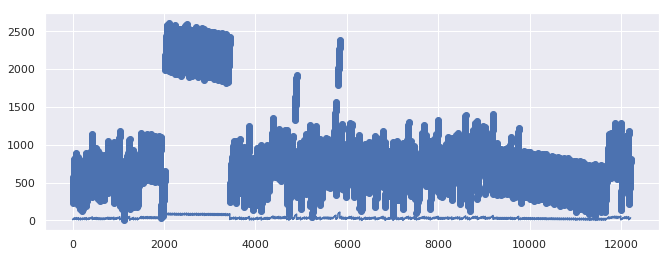

In [62]:
plt.scatter(range(len(predicted)), predicted[:,0])
plt.plot(range(len(predicted)), predicted[:,1])
plt.show()

### SVR

In [63]:
from sklearn.svm import SVR

In [64]:
pipeline = Pipeline([('scaler', StandardScaler()), ('estimator', SVR())])
pipeline.fit(train_numeric_X, train_numeric_Y.values[:,0])

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('estimator',
                 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
                     gamma='scale', kernel='rbf', max_iter=-1, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [65]:
pipeline2 = Pipeline([('scaler', StandardScaler()), ('estimator', SVR())])
pipeline2.fit(train_numeric_X, train_numeric_Y.values[:,1])

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('estimator',
                 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
                     gamma='scale', kernel='rbf', max_iter=-1, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [66]:
discovered, fatal = pipeline.predict(test_numeric_X), pipeline2.predict(test_numeric_X)

In [67]:
submission = np.vstack((test['ForecastId'], discovered, fatal)).T
submission = submission.astype(np.int32)

In [68]:
df = pd.DataFrame(data=submission, columns=['ForecastId','ConfirmedCases','Fatalities'])
# df.to_csv('SVR_submission.csv', index=False)
df.to_csv('submission.csv', index=False)

### Random Forest

In [69]:
這才是我們的主要方法之一，原因是我們的資料實際上已經離散化，對此使用基於機率的決策樹模型顯得更為有效。
LR是透過最小平方法或是最小化mse來做到的，而根據mse的物理意義可以發現，他求得的是距離誤差最小，然而對於類別型資料並沒有明確的距離的概念。
然而，SVM也是透過lasso來求得最大margin，其中計算的方式也是透過投影的距離，這也與我們類別型資料不符。

SyntaxError: invalid character in identifier (<ipython-input-69-822af224da44>, line 1)

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
clf = RandomForestClassifier(n_estimators=50,n_jobs=4)
clf.fit(train_numeric_X, train_numeric_Y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [72]:
predicted = clf.predict(test_numeric_X)
submission = np.vstack((test['ForecastId'], predicted[:,0],predicted[:,1])).T
submission = submission.astype(np.int32)
df = pd.DataFrame(data=submission, columns=['ForecastId','ConfirmedCases','Fatalities'])
# df.to_csv('RF_submission.csv', index=False)
df.to_csv('submission.csv', index=False)

### Evaluation

In [73]:
train_y_pred = clf.predict(train_numeric_X)

#### Actual Value v.s. Predicted Results

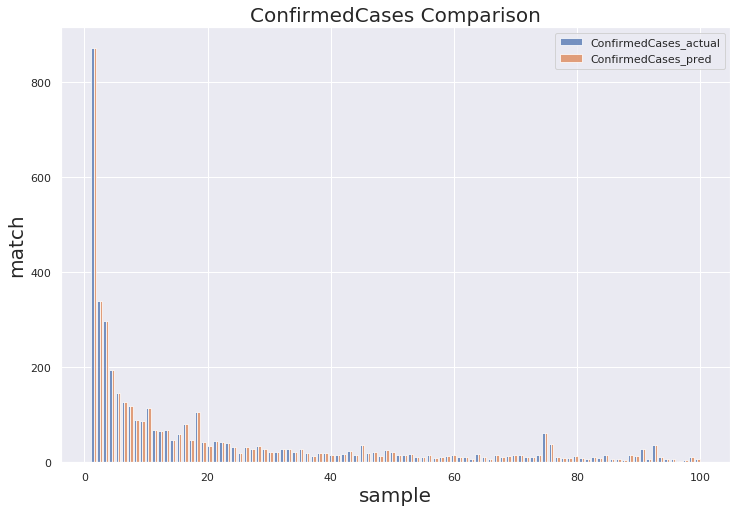

In [74]:
plt.figure(figsize=(12,8))
plt.hist([train_numeric_Y['ConfirmedCases'],train_y_pred[:,0]],bins=100, range=(1,100), label=['ConfirmedCases_actual','ConfirmedCases_pred'],alpha=0.75)
plt.title('ConfirmedCases Comparison',fontsize=20)
plt.xlabel('sample',fontsize=20)
plt.ylabel('match',fontsize=20)
plt.legend()
plt.show()

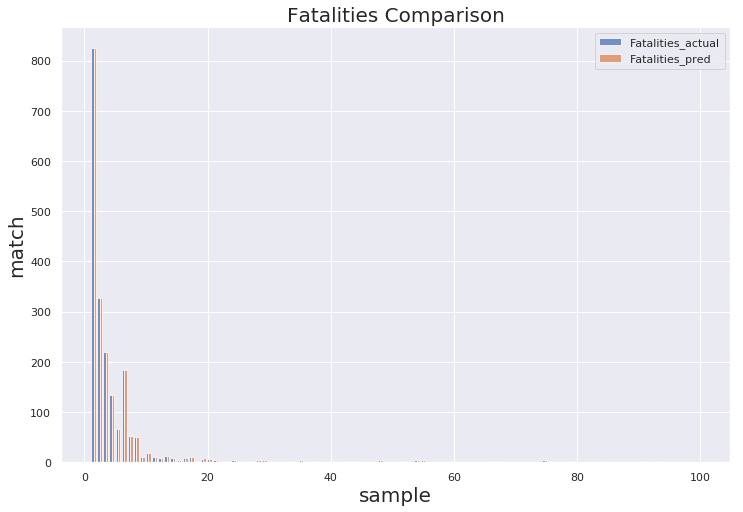

In [75]:
plt.figure(figsize=(12,8))
plt.hist([train_numeric_Y['Fatalities'],train_y_pred[:,1]],bins=100, range=(1,100), label=['Fatalities_actual','Fatalities_pred'],alpha=0.75)
plt.title('Fatalities Comparison',fontsize=20)
plt.xlabel('sample',fontsize=20)
plt.ylabel('match',fontsize=20)
plt.legend()
plt.show()

#### Root Mean Square Error

> Submissions are evaluated using the column-wise root mean squared logarithmic error.

In [76]:
error = train_y_pred - train_numeric_Y
error

,ConfirmedCases,Fatalities
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
17319,0.0,0.0
17320,0.0,0.0
17321,0.0,0.0
17322,0.0,0.0


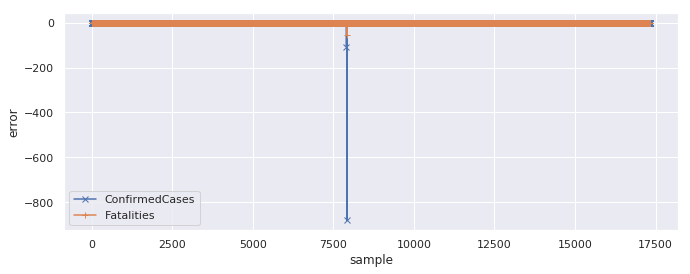

In [77]:
fig,ax = plt.subplots()
 
plt.xlabel('sample')
plt.ylabel('error')

plt.plot(range(len(error)), error['ConfirmedCases'], "x-",label="ConfirmedCases")
plt.plot(range(len(error)), error['Fatalities'], "+-", label="Fatalities")

plt.grid(True)
plt.legend()
plt.show()

In [78]:
np.sum((np.log(train_y_pred) - np.log(train_numeric_Y))**2) / len(test_numeric_X)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


ConfirmedCases    0.000027
Fatalities        0.000012
dtype: float64

### Correlation Visualization

#### Pearson

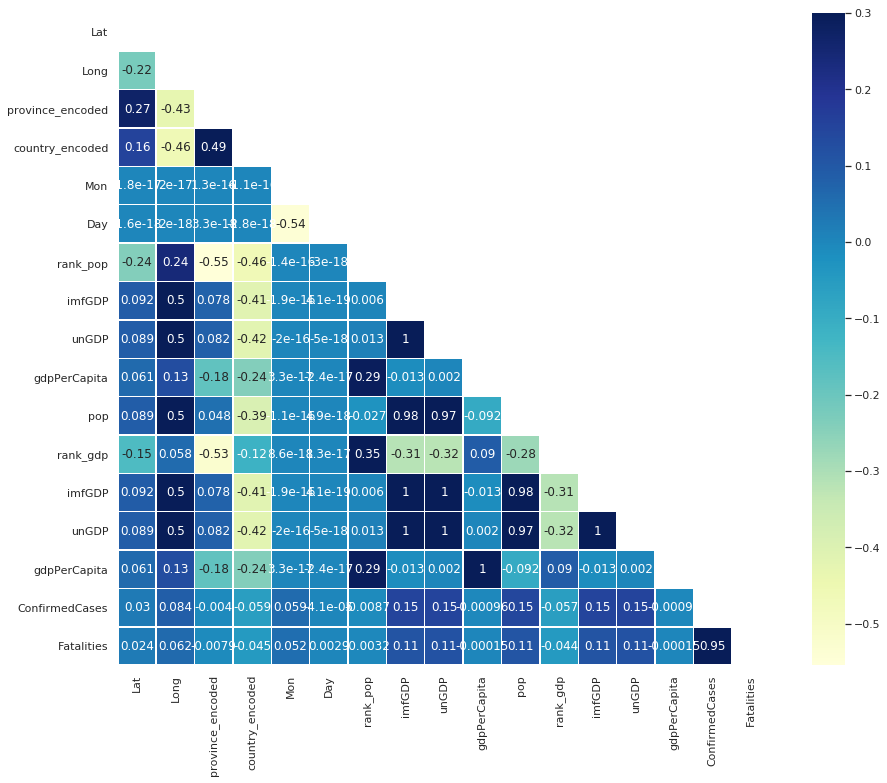

In [79]:
corr = train[numeric_features_X+numeric_features_Y].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
with sns.axes_style("white"):
    # Draw the heatmap with the mask and correct aspect ratio
    f, ax = plt.subplots(figsize=(15, 12))
    ax = sns.heatmap(corr, mask=mask,annot=True,cmap="YlGnBu",vmax=.3, square=True, linewidths=.4)
plt.show()

#### Spearman

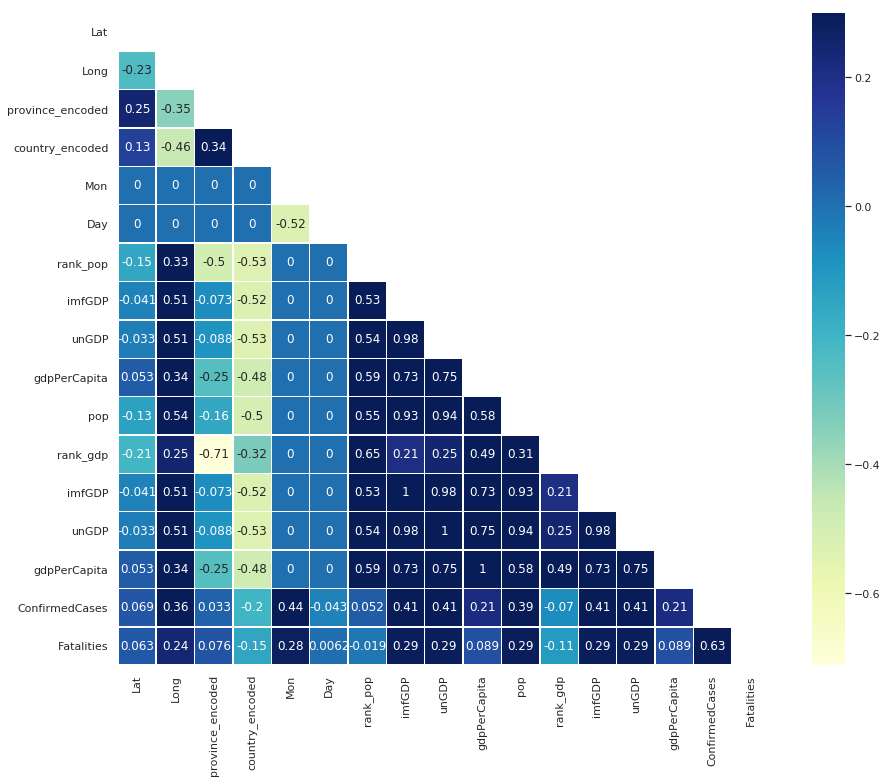

In [80]:
corr = train[numeric_features_X+numeric_features_Y].corr(method='spearman')
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
with sns.axes_style("white"):
    # Draw the heatmap with the mask and correct aspect ratio
    f, ax = plt.subplots(figsize=(15, 12))
    ax = sns.heatmap(corr, mask=mask,annot=True,cmap="YlGnBu",vmax=.3, square=True, linewidths=.4)
plt.show()

#### Kendall

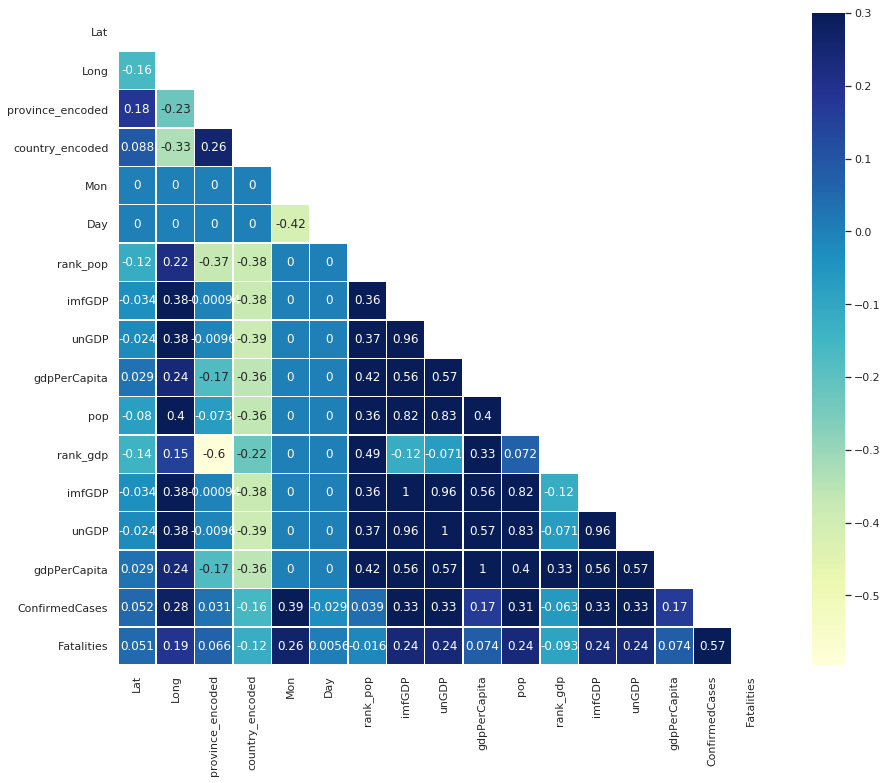

In [81]:
corr = train[numeric_features_X+numeric_features_Y].corr(method='kendall')
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
with sns.axes_style("white"):
    # Draw the heatmap with the mask and correct aspect ratio
    f, ax = plt.subplots(figsize=(15, 12))
    ax = sns.heatmap(corr, mask=mask,annot=True,cmap="YlGnBu",vmax=.3, square=True, linewidths=.4)
plt.show()

#### Weights

Parameter weights corresponding to `'Lat','Long', 'province_encoded' ,'country_encoded','Mon','Day'`

In [82]:
clf.feature_importances_

array([0.08663805, 0.1038775 , 0.07770489, 0.02041531, 0.13346266,
       0.39223517, 0.01318836, 0.03015664, 0.0295124 , 0.0131869 ,
       0.01918378, 0.01209973, 0.03224904, 0.02346045, 0.01262911])

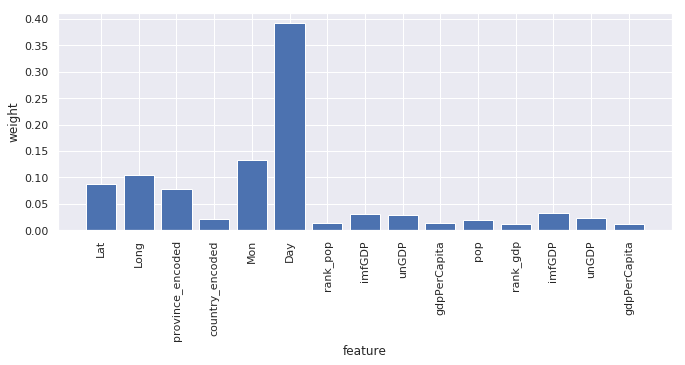

In [83]:
plt.bar(range(len(numeric_features_X)), clf.feature_importances_, tick_label=numeric_features_X)
plt.xlabel('feature')
plt.ylabel('weight')
plt.xticks(rotation=90)
plt.show()

#### Scatter Data points 

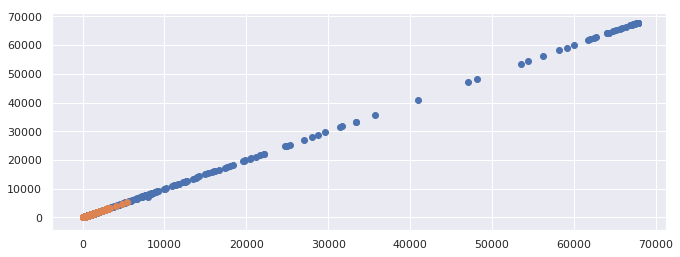

In [84]:
f,ax = plt.subplots()
ax.scatter(train_numeric_Y['ConfirmedCases'], train_y_pred[:,0])
ax.scatter(train_numeric_Y['Fatalities'], train_y_pred[:,1])

plt.show()

### Relationship with the number of decision tree composed of RF

In [85]:
clf1 = RandomForestClassifier(n_estimators=1,n_jobs=4)
clf3 = RandomForestClassifier(n_estimators=3,n_jobs=4)
clf5 = RandomForestClassifier(n_estimators=5,n_jobs=4)
clf10 = RandomForestClassifier(n_estimators=10,n_jobs=4)
clf50 = RandomForestClassifier(n_estimators=50,n_jobs=4)

In [86]:
clf1.fit(train_numeric_X, train_numeric_Y)
clf3.fit(train_numeric_X, train_numeric_Y)
clf5.fit(train_numeric_X, train_numeric_Y)
clf10.fit(train_numeric_X, train_numeric_Y)
clf50.fit(train_numeric_X, train_numeric_Y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [87]:
predicted1 = clf1.predict(train_numeric_X)
predicted3 = clf3.predict(train_numeric_X)
predicted5 = clf5.predict(train_numeric_X)
predicted10 = clf10.predict(train_numeric_X)
predicted50 = clf50.predict(train_numeric_X)

In [88]:
a = np.sum((predicted1) - (train_numeric_Y))**2 / len(predicted1)
b = np.sum((predicted3) - (train_numeric_Y))**2 / len(predicted3)
c = np.sum((predicted5) - (train_numeric_Y))**2 / len(predicted5)
d = np.sum((predicted10) - (train_numeric_Y))**2 / len(predicted10)
e = np.sum((predicted50) - (train_numeric_Y))**2 / len(predicted50)

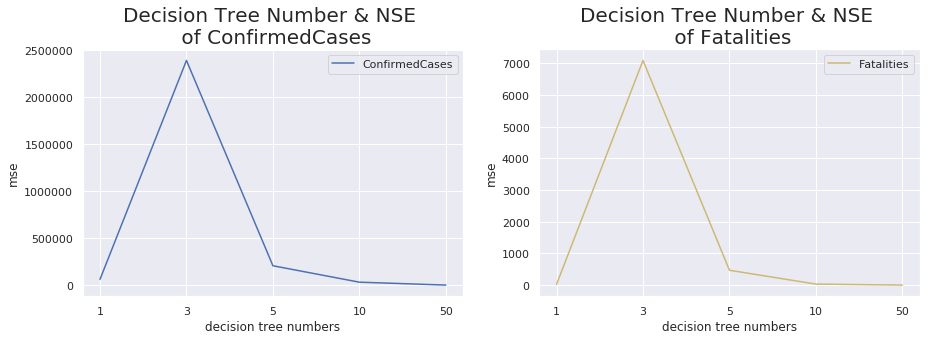

In [89]:
dt_nums = [1,3,5,10,50]
plt.figure(figsize=(15,10))

plt.subplot(221)
plt.title('Decision Tree Number & NSE \n of ConfirmedCases',fontsize=20)
plt.plot(range(len(dt_nums)), [a['ConfirmedCases'],b['ConfirmedCases'],c['ConfirmedCases'],d['ConfirmedCases'],e['ConfirmedCases']],
         label='ConfirmedCases')
plt.xlabel('decision tree numbers')
plt.ylabel('mse')
plt.xticks(range(len(dt_nums)),dt_nums)
plt.legend()

plt.subplot(222)
plt.title('Decision Tree Number & NSE \n of Fatalities',fontsize=20)
plt.plot(range(len(dt_nums)), [a['Fatalities'],b['Fatalities'],c['Fatalities'],d['Fatalities'],e['Fatalities']],
         label='Fatalities',color='y')
plt.xlabel('decision tree numbers')
plt.ylabel('mse')
plt.xticks(range(len(dt_nums)),dt_nums)
plt.legend()

plt.show()

Above diagram demostrated that with about 5 decision tree, RF had been enough good to fit in our dataset 

#### PCA to 2-D space

In [90]:
from sklearn.decomposition import PCA

In [91]:
pca = PCA(n_components=2)

In [92]:
pca_X = pca.fit_transform(train_numeric_X)

In [93]:
pca_testX = pca.transform(test_numeric_X)

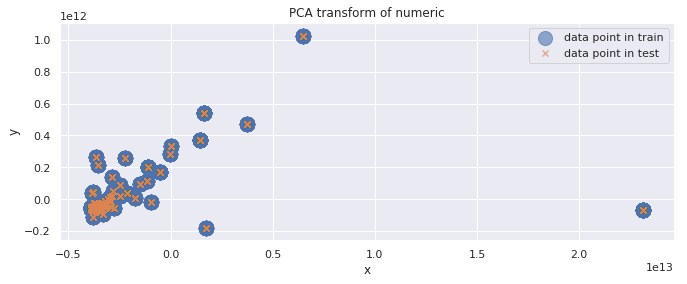

In [94]:
plt.title('PCA transform of numeric')
plt.scatter(pca_X[:,0], pca_X[:,1],label='data point in train',alpha=0.6,s=200)
plt.scatter(pca_testX[:,0], pca_testX[:,1],label='data point in test',alpha=0.6,marker='x')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()